In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# df = pd.read_csv("hf://datasets/criteo/FairJob/fairjob.csv.gz")abs
# df.to_csv("fairjob.csv", index=False)

df_unsplitted=pd.read_csv('D:/Harsh/MTech/ML/fairjob.csv/criteo_fairness_dataset_2024-01-01_2024-05-20.csv');


In [4]:
test_size = 0.2

df = df_unsplitted.sample(frac=1 - test_size, random_state=42)  # Training set
df_test = df_unsplitted.drop(df.index)  # Testing set



In [10]:
df.head()

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
753729,0,1,1,0,5,12518,64497,27087,6,6,...,-0.333033,-0.542801,0.655377,-0.987701,-0.465636,-0.744993,-0.345480,-0.577173,-0.264359,-0.996450
122436,0,1,0,0,13,14469,53811,54411,6,6,...,-0.333033,-0.542801,-0.393358,0.448728,0.404589,0.254919,-0.345480,-0.577173,-0.264359,0.506627
523634,0,0,1,0,7,17095,26599,43801,7,7,...,-0.333033,-0.542801,-0.380530,-0.987701,-0.523668,-0.778977,-0.067343,0.257664,-0.264359,-0.996450
229605,0,0,1,0,9,20901,104145,52468,8,8,...,-0.333033,-0.542801,-0.265073,2.323932,0.776370,2.581877,0.025369,0.257664,-0.264359,2.424345
614626,0,0,1,0,15,27122,198021,39600,8,8,...,0.797359,0.925347,10.254352,-0.245205,-0.327229,-0.527551,-0.345480,3.597013,-0.264359,-0.218996


### Basic Details

In [4]:
df.shape

(857781, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857781 entries, 753729 to 968286
Data columns (total 56 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   click                857781 non-null  int64  
 1   protected_attribute  857781 non-null  int64  
 2   senior               857781 non-null  int64  
 3   displayrandom        857781 non-null  int64  
 4   rank                 857781 non-null  int64  
 5   user_id              857781 non-null  int64  
 6   impression_id        857781 non-null  int64  
 7   product_id           857781 non-null  int64  
 8   cat0                 857781 non-null  int64  
 9   cat1                 857781 non-null  int64  
 10  cat2                 857781 non-null  int64  
 11  cat3                 857781 non-null  int64  
 12  cat4                 857781 non-null  int64  
 13  cat5                 857781 non-null  int64  
 14  cat6                 857781 non-null  int64  
 15  cat7             

In [14]:
print("Unique user_id:", df['user_id'].nunique())
print("Unique product_id:", df['product_id'].nunique())
print("Unique impression_id:", df['impression_id'].nunique())

Unique user_id: 29179
Unique product_id: 54202
Unique impression_id: 210871


In [15]:
df.groupby(['user_id', 'product_id']).ngroups

480321

In [16]:
df.groupby(['user_id', 'impression_id']).ngroups

210871

In [17]:
df.groupby(['product_id', 'impression_id']).ngroups

852629

In [18]:
df.groupby(['user_id', 'product_id', 'impression_id']).ngroups

852629

In [23]:
df.groupby(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5']).ngroups

120252

In [24]:
df.groupby(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5','user_id']).ngroups

478962

In [19]:
key_counts = df.groupby(['product_id', 'impression_id']).size()

# Filter to get only the repeated keys
repeated_keys = key_counts[key_counts > 1]

# Display the repeated keys and their counts
print(repeated_keys)

product_id  impression_id
15          220260           2
43          164377           2
            169945           2
            169970           2
            170000           2
                            ..
62057       62475            2
62067       206413           2
            210310           2
            210334           2
62119       219310           2
Length: 5152, dtype: int64


In [20]:
total_repeated_rows = repeated_keys.sum()

print(f"Total number of rows with repeated keys: {total_repeated_rows}")

Total number of rows with repeated keys: 10304


In [8]:
df.columns

Index(['click', 'protected_attribute', 'senior', 'displayrandom', 'rank',
       'user_id', 'impression_id', 'product_id', 'cat0', 'cat1', 'cat2',
       'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
       'cat11', 'cat12', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21',
       'num22', 'num23', 'num24', 'num25', 'num26', 'num27', 'num28', 'num29',
       'num30', 'num31', 'num32', 'num33', 'num34', 'num35', 'num36', 'num37',
       'num38', 'num39', 'num40', 'num41', 'num42', 'num43', 'num44', 'num45',
       'num46', 'num47', 'num48', 'num49', 'num50'],
      dtype='object')

In [9]:
df.isnull().sum()

click                  0
protected_attribute    0
senior                 0
displayrandom          0
rank                   0
user_id                0
impression_id          0
product_id             0
cat0                   0
cat1                   0
cat2                   0
cat3                   0
cat4                   0
cat5                   0
cat6                   0
cat7                   0
cat8                   0
cat9                   0
cat10                  0
cat11                  0
cat12                  0
num16                  0
num17                  0
num18                  0
num19                  0
num20                  0
num21                  0
num22                  0
num23                  0
num24                  0
num25                  0
num26                  0
num27                  0
num28                  0
num29                  0
num30                  0
num31                  0
num32                  0
num33                  0
num34                  0


In [10]:
df.duplicated().sum()

0

In [11]:
for column in df.columns:
    print(f"Summary statistics for {column}:\n", df[column].describe(), "\n")

Summary statistics for click:
 count    857781.000000
mean          0.006868
std           0.082587
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click, dtype: float64 

Summary statistics for protected_attribute:
 count    857781.000000
mean          0.499914
std           0.500000
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: protected_attribute, dtype: float64 

Summary statistics for senior:
 count    857781.000000
mean          0.665399
std           0.471851
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: senior, dtype: float64 

Summary statistics for displayrandom:
 count    857781.000000
mean          0.098681
std           0.298234
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: displa

Summary statistics for num33:
 count    857781.000000
mean         -0.010684
std           0.996975
min          -0.387679
25%          -0.387679
50%          -0.371126
75%          -0.059935
max          19.982095
Name: num33, dtype: float64 

Summary statistics for num34:
 count    857781.000000
mean          0.005415
std           1.048220
min          -0.313413
25%          -0.300154
50%          -0.242696
75%          -0.058537
max          54.493728
Name: num34, dtype: float64 

Summary statistics for num35:
 count    857781.000000
mean          0.013879
std           1.012069
min          -1.026151
25%          -1.026151
50%           0.666572
75%           0.666572
max           2.359296
Name: num35, dtype: float64 

Summary statistics for num36:
 count    857781.000000
mean         -0.010507
std           0.998865
min          -0.398386
25%          -0.398386
50%          -0.369281
75%          -0.045891
max          19.499801
Name: num36, dtype: float64 

Summary statistics f

### Plots

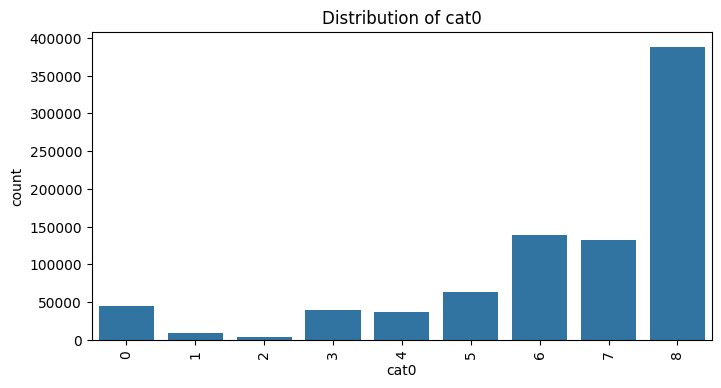

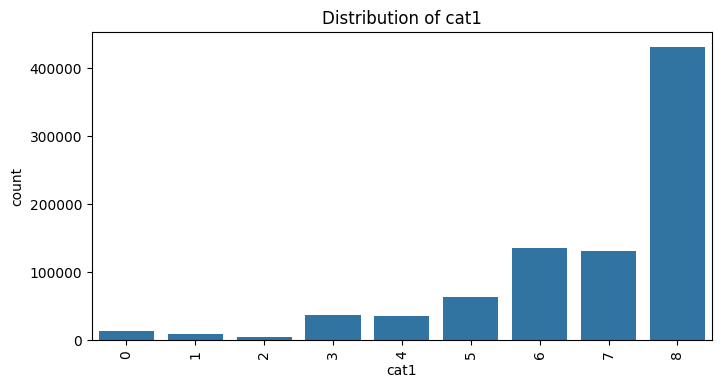

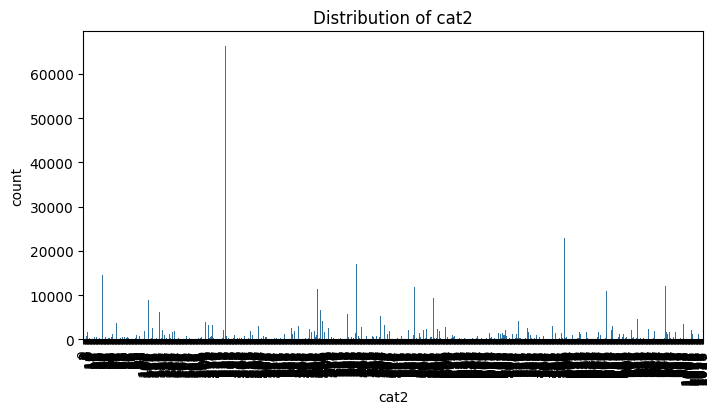

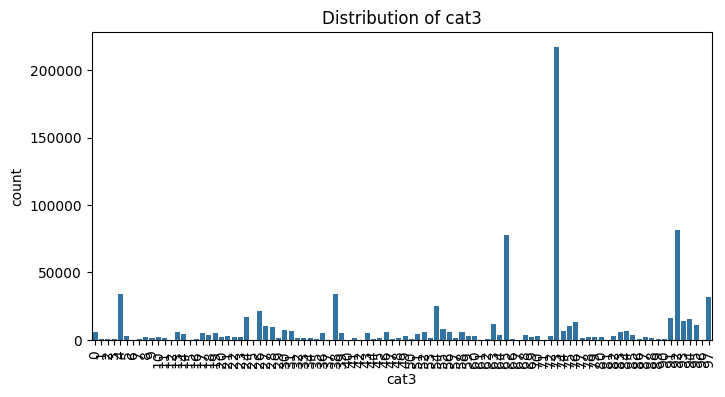

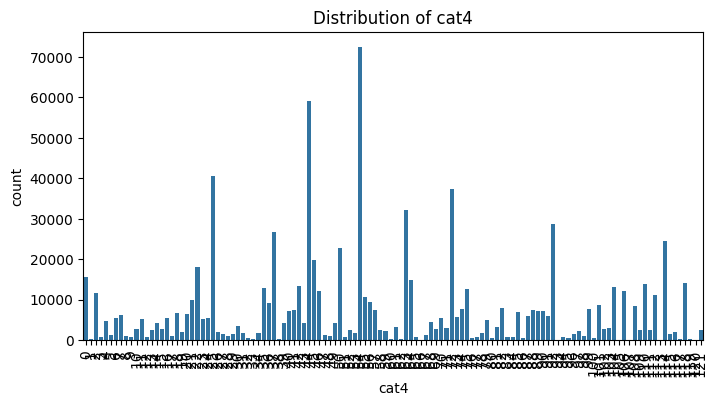

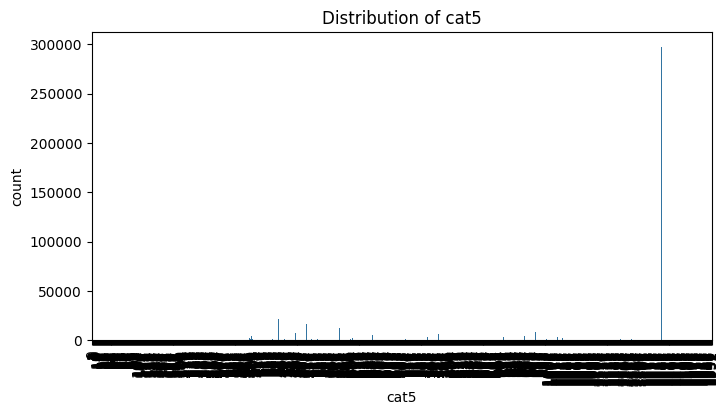

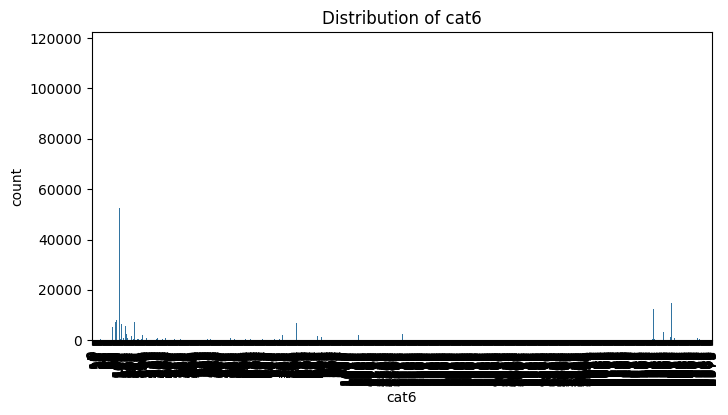

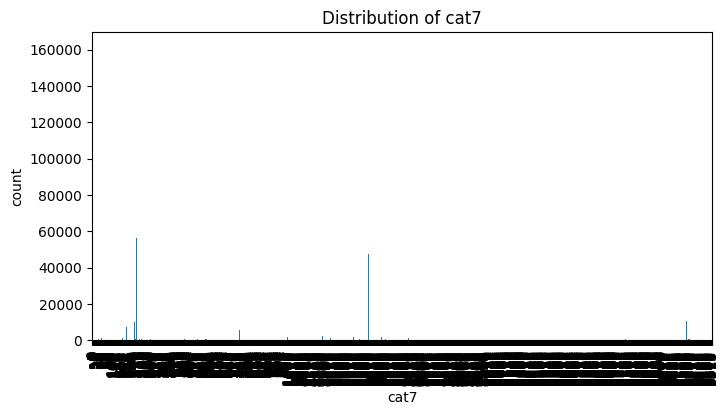

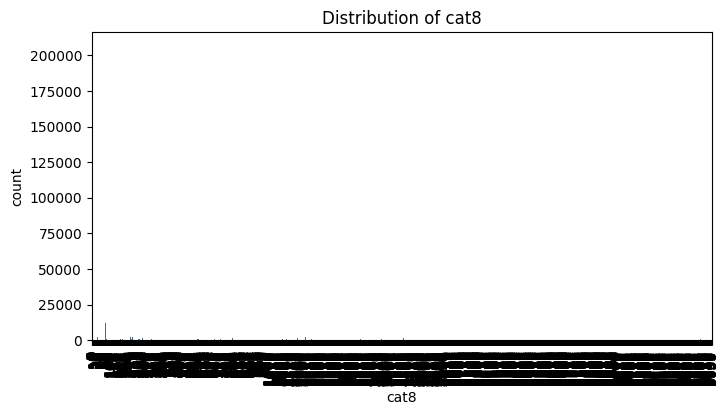

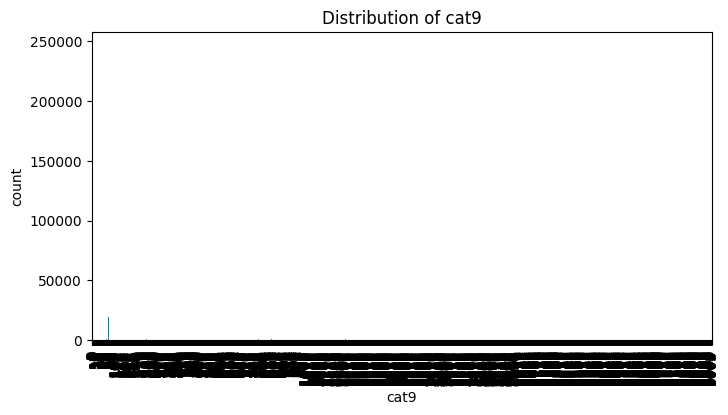

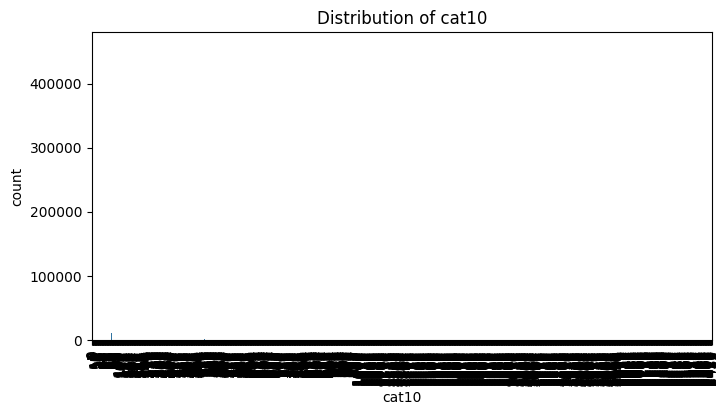

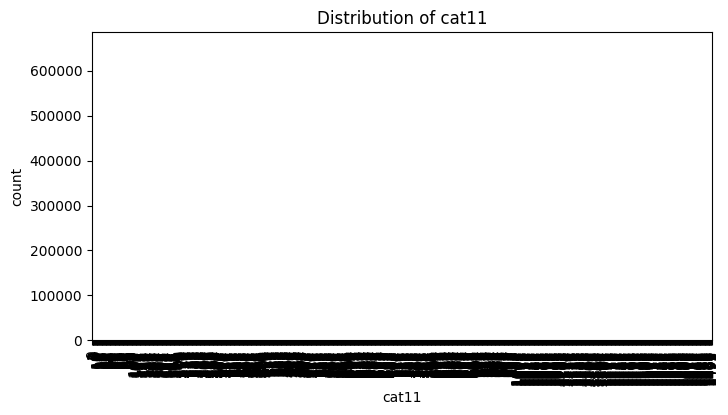

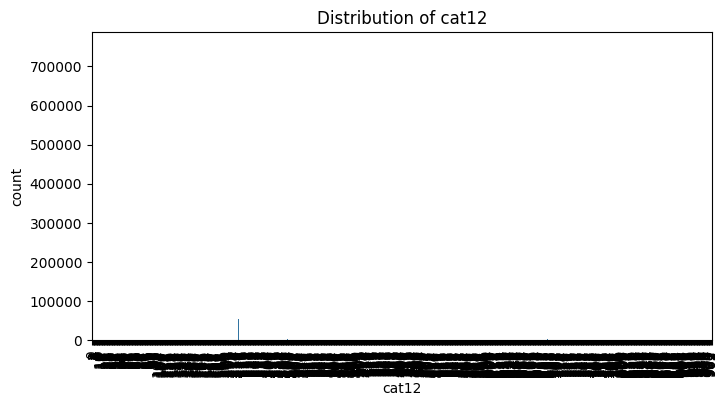

In [12]:
for col in ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

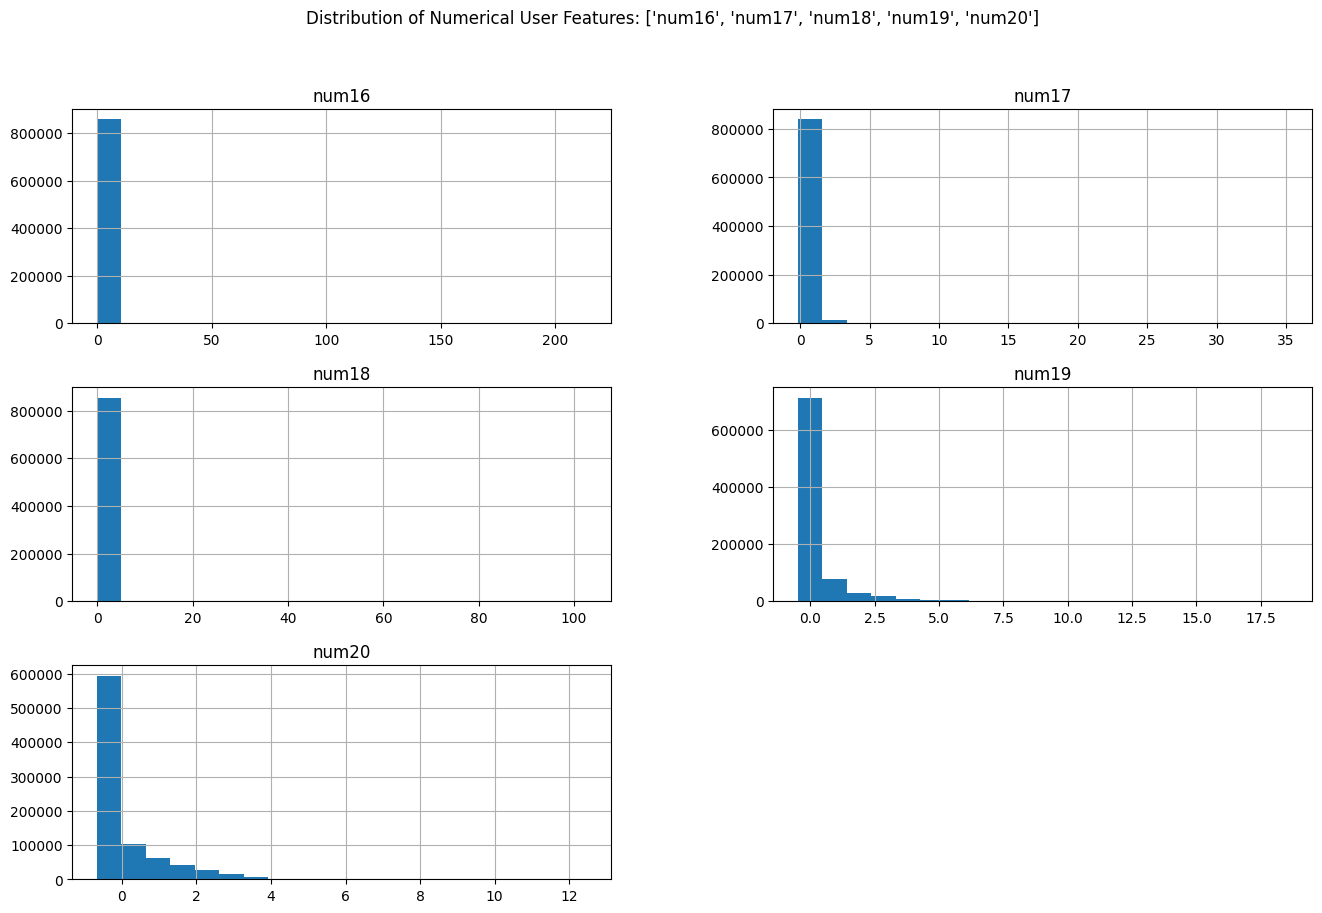

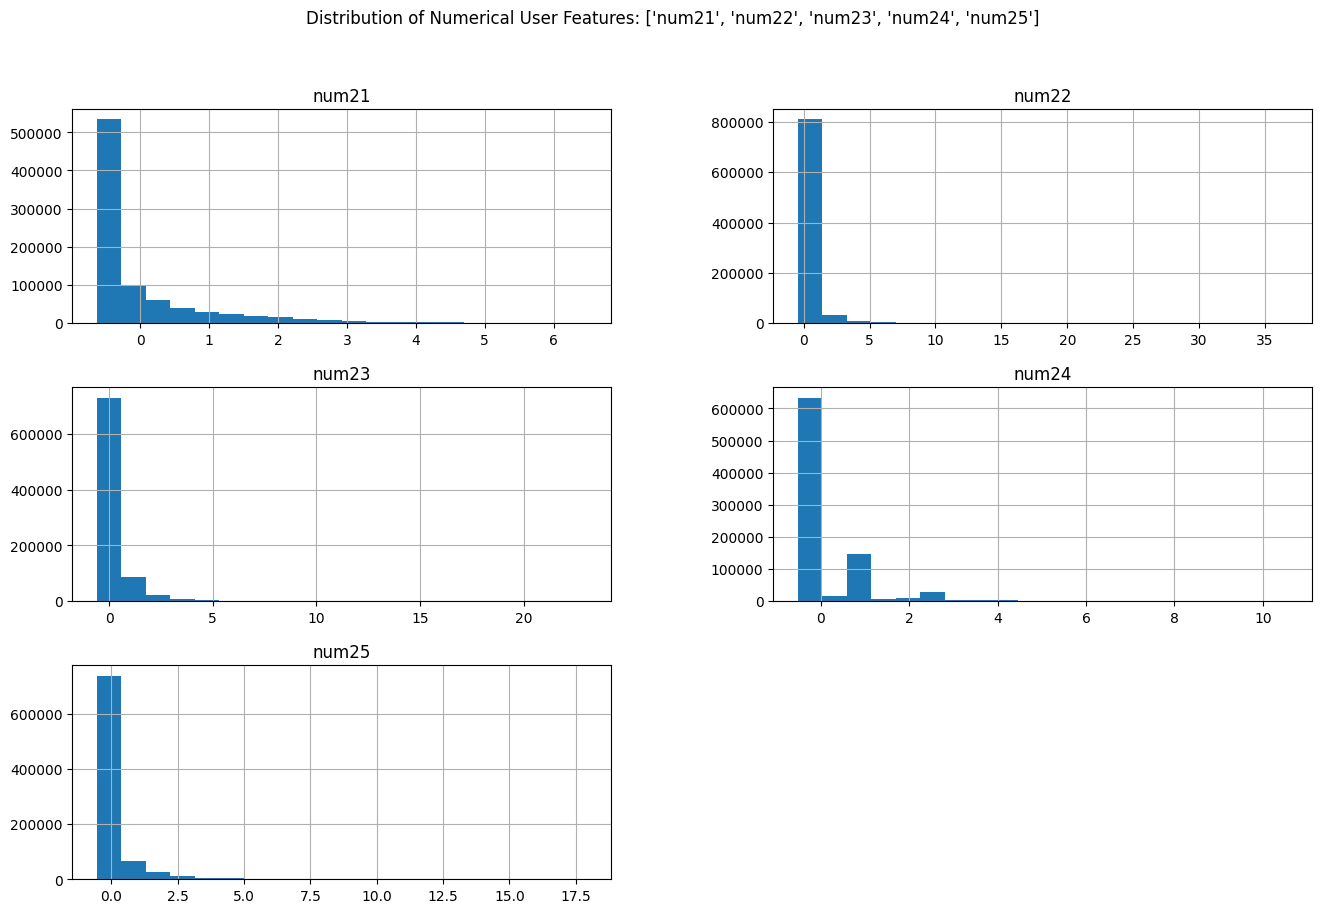

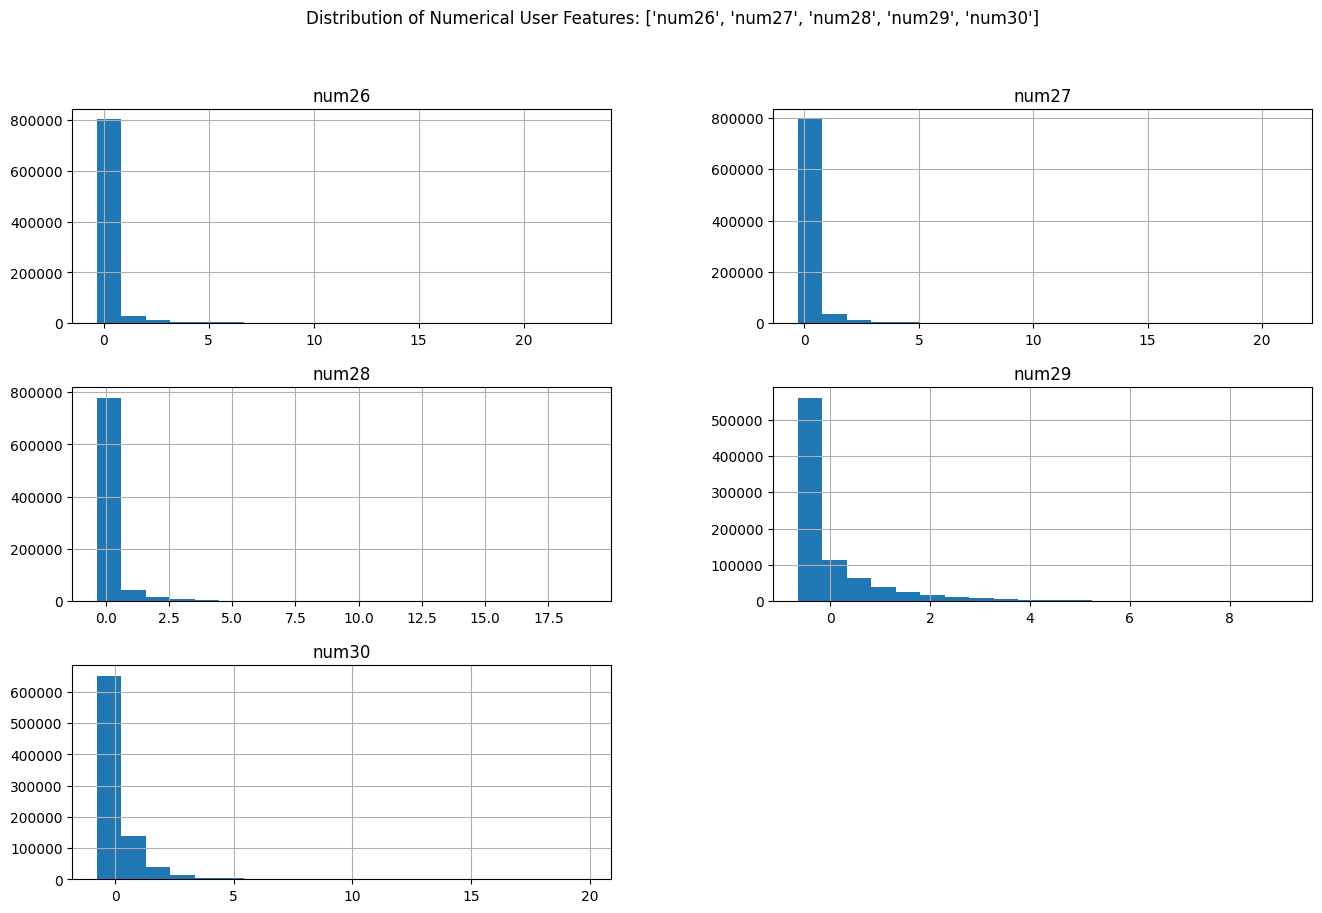

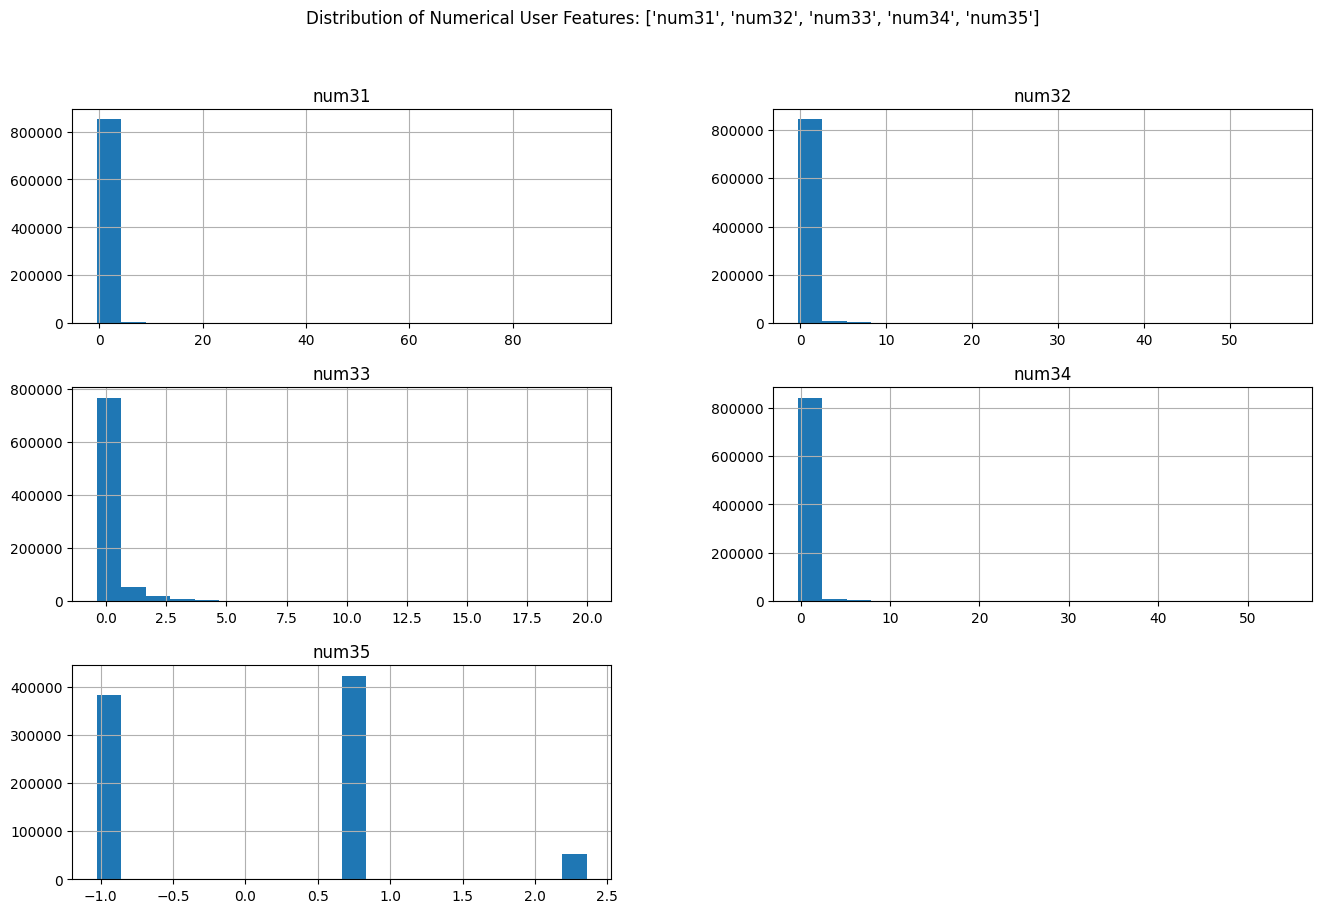

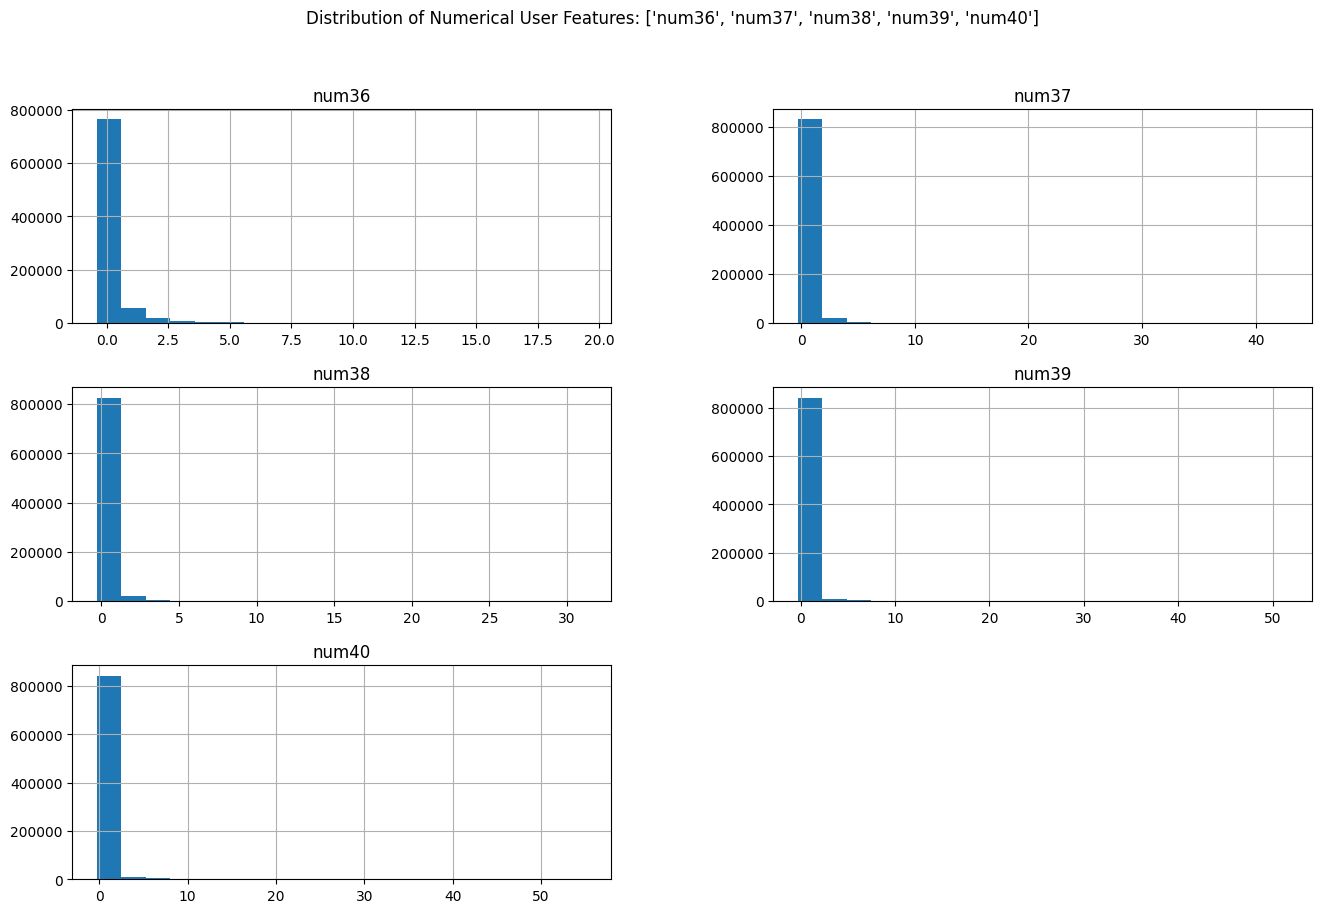

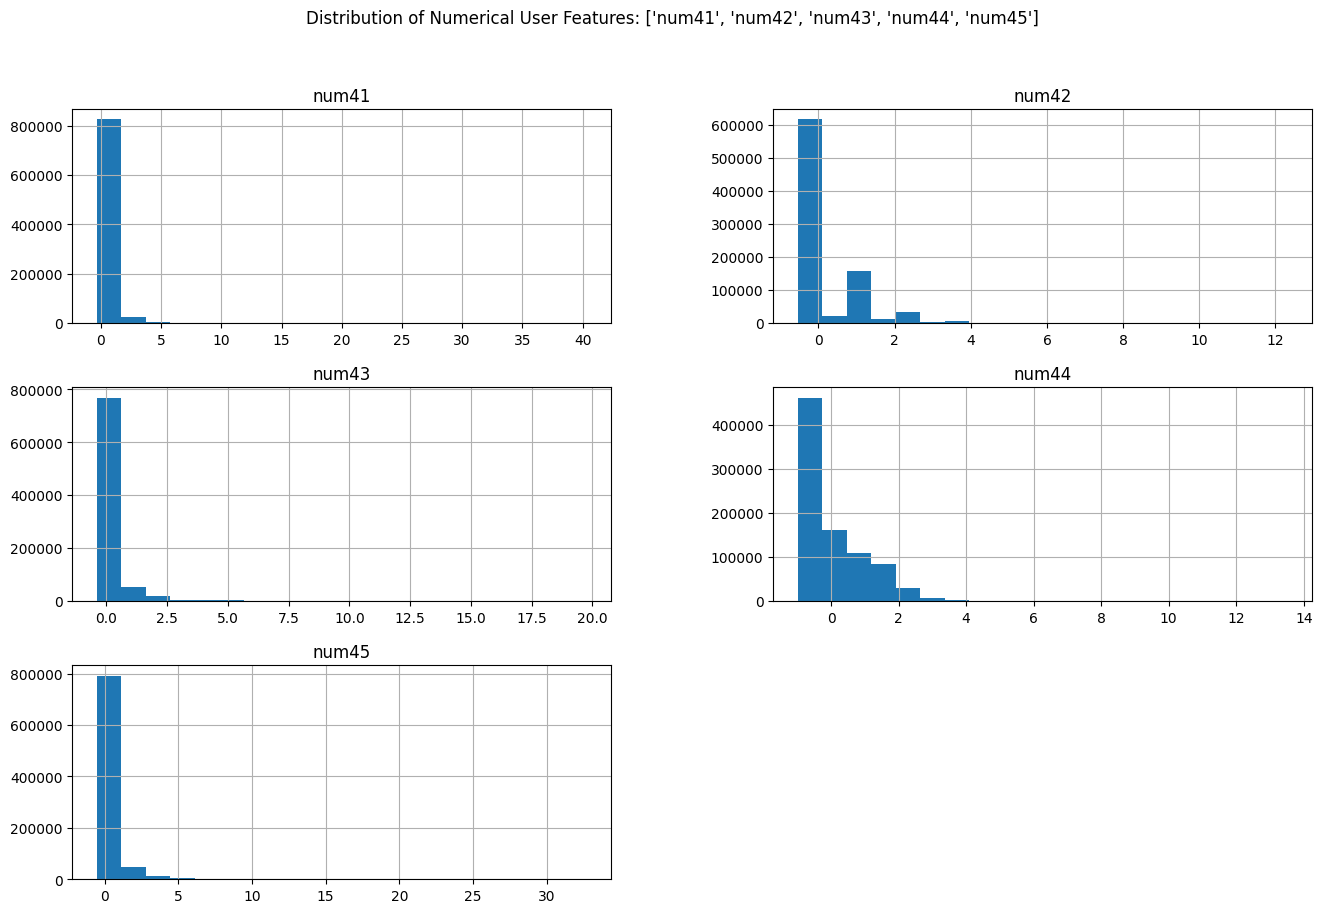

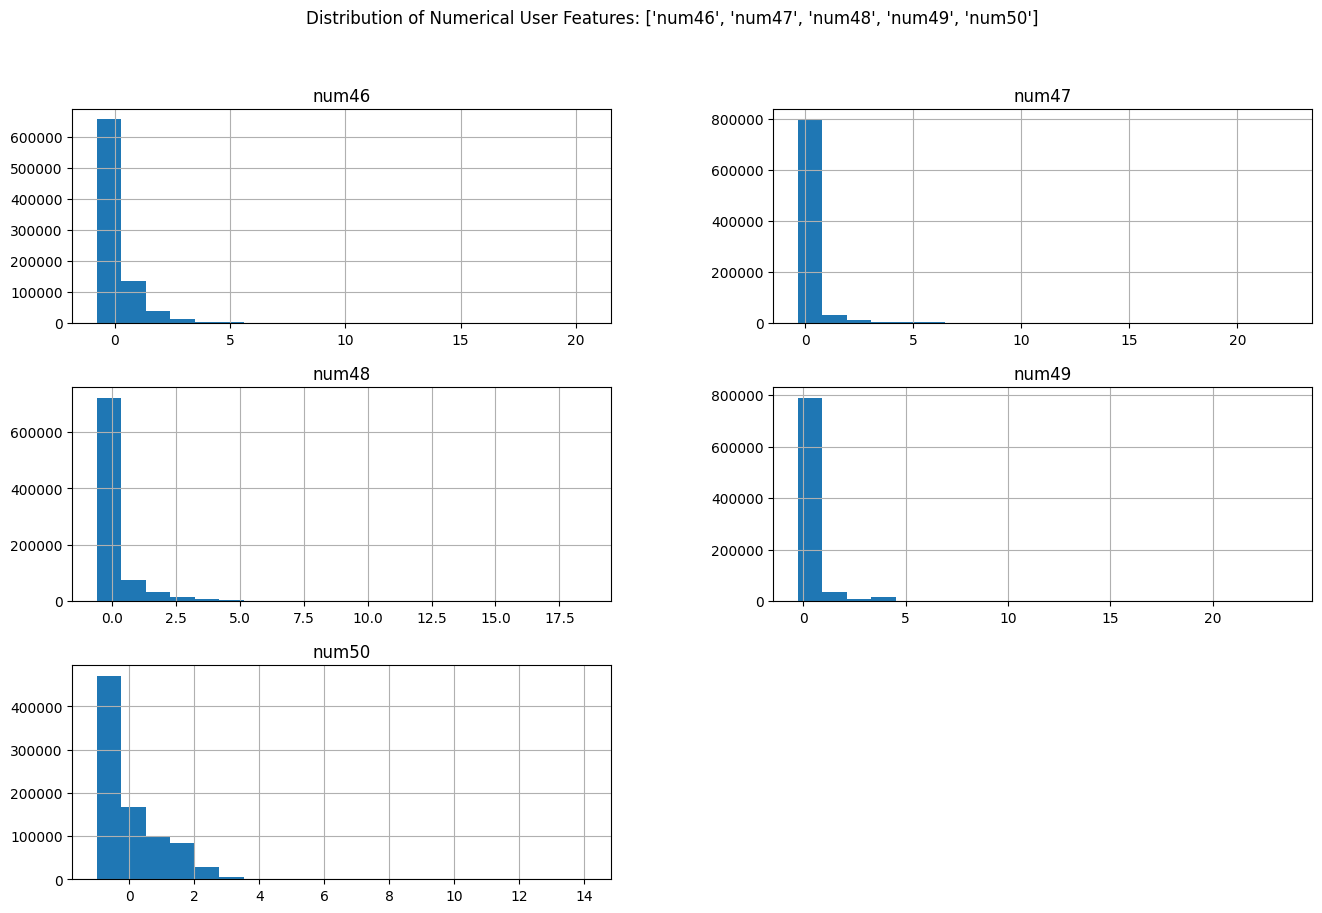

In [4]:
numerical_features = [f'num{i}' for i in range(16, 51)]

for i in range(0, len(numerical_features), 5):
    cols = numerical_features[i:i+5]
    
    df[cols].hist(bins=20, figsize=(16, 10))
    plt.suptitle(f"Distribution of Numerical User Features: {cols}")
    plt.show()

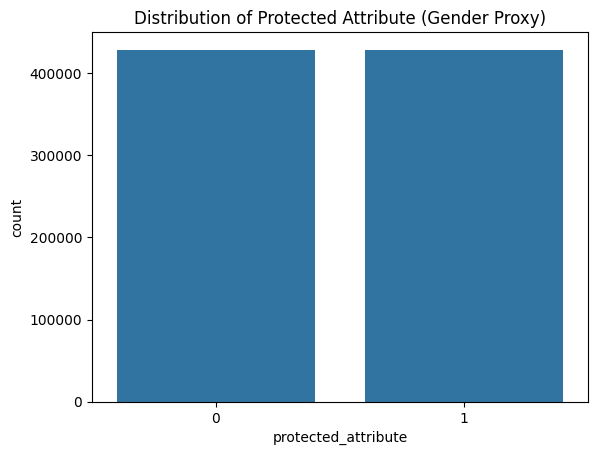

In [14]:
sns.countplot(data=df, x='protected_attribute')
plt.title("Distribution of Protected Attribute (Gender Proxy)")
plt.show()

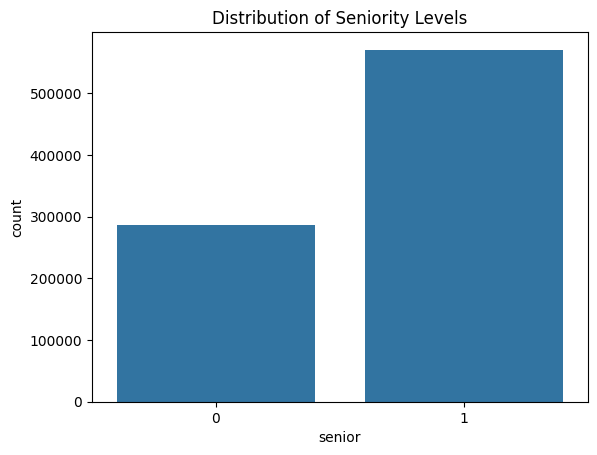

In [15]:
sns.countplot(data=df, x='senior')
plt.title("Distribution of Seniority Levels")
plt.show()

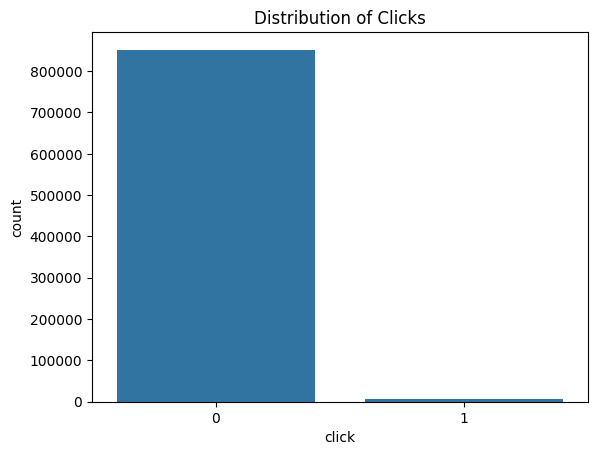

In [16]:
sns.countplot(data=df, x='click')
plt.title("Distribution of Clicks")
plt.show()

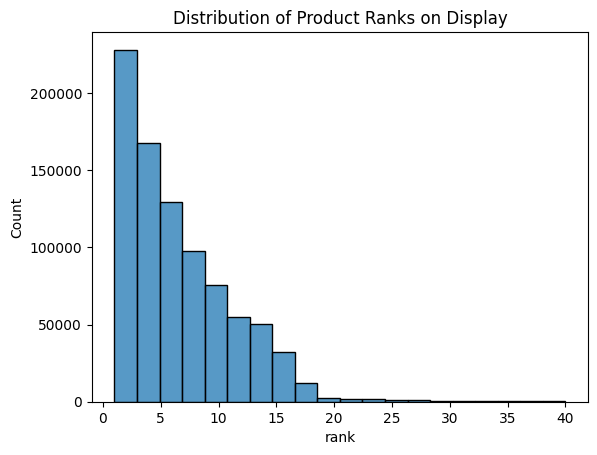

In [17]:
sns.histplot(data=df, x='rank', bins=20)
plt.title("Distribution of Product Ranks on Display")
plt.show()

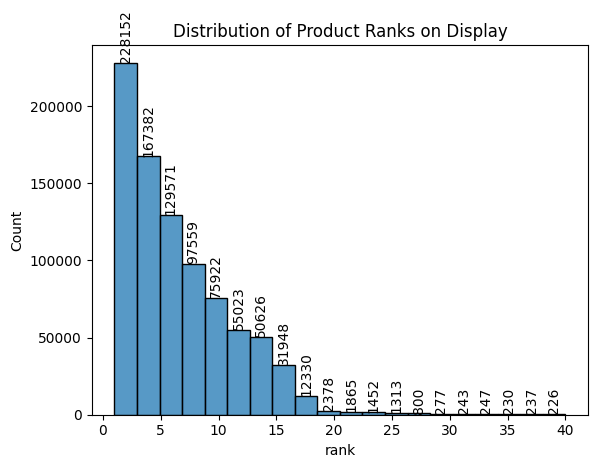

In [18]:
sns.histplot(data=df, x='rank', bins=20, stat='count')
plt.title("Distribution of Product Ranks on Display")

# Add text annotations for each bar
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only label bars with height
        plt.text(p.get_x() + p.get_width() / 2, height, int(height), 
                 ha="center", va="bottom", fontsize=10, rotation=90)

plt.show()

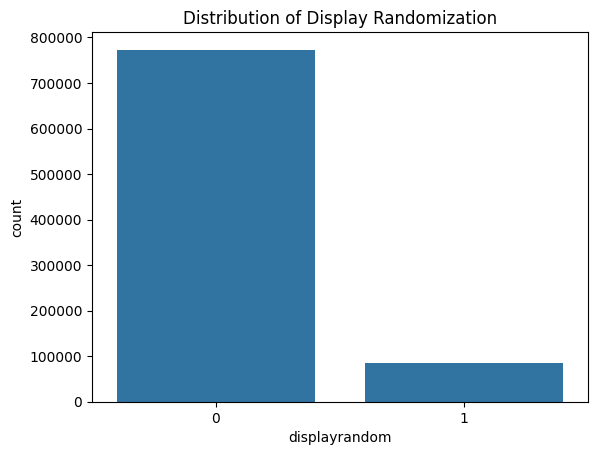

In [19]:
sns.countplot(data=df, x='displayrandom')
plt.title("Distribution of Display Randomization")
plt.show()

### Displayrandom

#### Conclusions :
- when an ad is displayed randomly, more than 50% of times it is displayed at a rank <=5

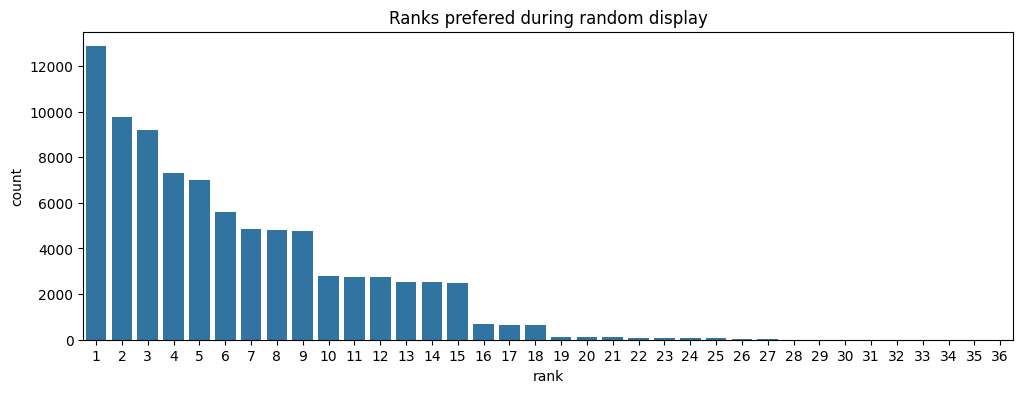

In [20]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df[df['displayrandom']==1], x='rank')
plt.title("Ranks prefered during random display")

plt.show()

In [21]:
df[df['displayrandom']==1].describe()

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
count,84647.000000,84647.000000,84647.000000,84647.0,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000,...,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000,84647.000000
mean,0.007147,0.498777,0.667561,1.0,6.141907,15999.832410,132284.848713,30700.045377,6.376847,6.734155,...,0.017184,0.023259,-0.007746,-0.006198,0.013614,0.007322,0.008756,0.001669,-0.009755,-0.010453
std,0.084240,0.500001,0.471090,0.0,4.621883,9183.362074,64240.388195,17763.454838,2.176150,1.755030,...,0.984621,1.026253,1.028766,0.990200,1.055728,1.022304,1.013416,0.986507,0.974325,0.985771
min,0.000000,0.000000,0.000000,1.0,1.000000,4.000000,87.000000,0.000000,0.000000,0.000000,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.523668,-0.778977,-0.345480,-0.577173,-0.264359,-0.996450
25%,0.000000,0.000000,0.000000,1.0,2.000000,8130.000000,78779.000000,14830.000000,6.000000,6.000000,...,-0.333033,-0.542801,-0.393358,-0.829151,-0.494652,-0.612780,-0.345480,-0.577173,-0.264359,-0.789129
50%,0.000000,0.000000,1.000000,1.0,5.000000,16048.000000,129829.000000,30878.000000,7.000000,8.000000,...,-0.333033,-0.542801,-0.354873,-0.335361,-0.349572,-0.303808,-0.345480,-0.577173,-0.264359,-0.374487
75%,0.000000,1.000000,1.000000,1.0,9.000000,24157.000000,189421.000000,45899.000000,8.000000,8.000000,...,-0.050435,0.925347,-0.046987,0.594910,0.085668,0.233523,-0.067343,0.257664,-0.264359,0.558457
max,1.000000,1.000000,1.000000,1.0,36.000000,31876.000000,246345.000000,62150.000000,8.000000,8.000000,...,33.296143,12.324090,18.381249,6.988833,27.111731,16.224220,13.998769,10.275710,22.127972,7.244556


### Feature vs Target relations

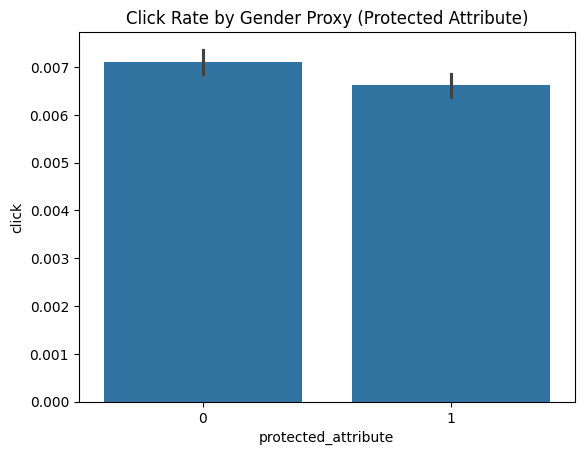

In [22]:
sns.barplot(data=df, x='protected_attribute', y='click')
plt.title("Click Rate by Gender Proxy (Protected Attribute)")
plt.show()

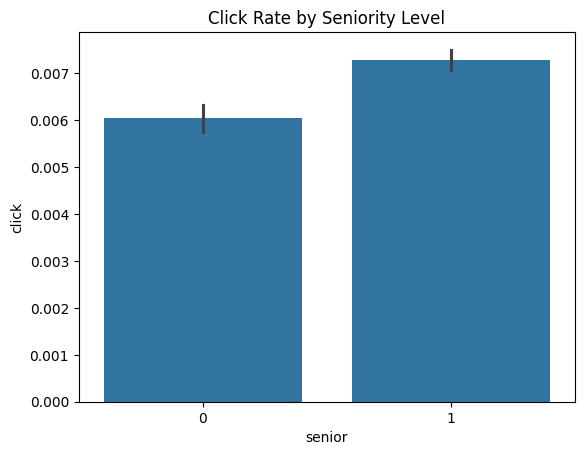

In [23]:
sns.barplot(data=df, x='senior', y='click')
plt.title("Click Rate by Seniority Level")
plt.show()

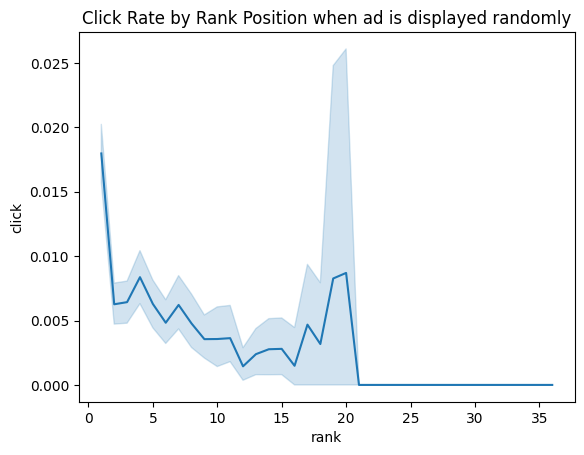

In [5]:
sns.lineplot(data=df[df['displayrandom']==1], x='rank', y='click')
plt.title("Click Rate by Rank Position when ad is displayed randomly")
plt.show()

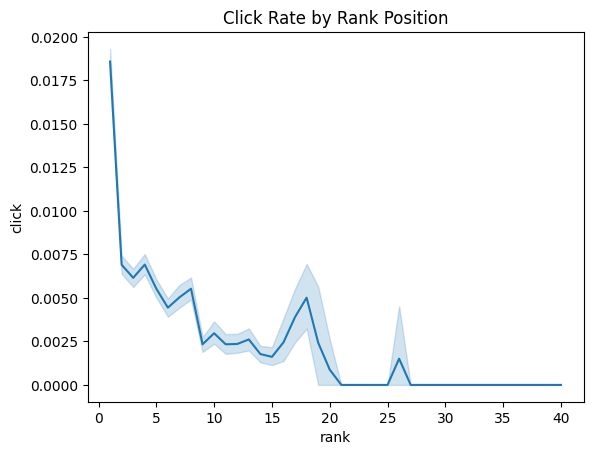

In [6]:
sns.lineplot(data=df, x='rank', y='click')
plt.title("Click Rate by Rank Position")
plt.show()

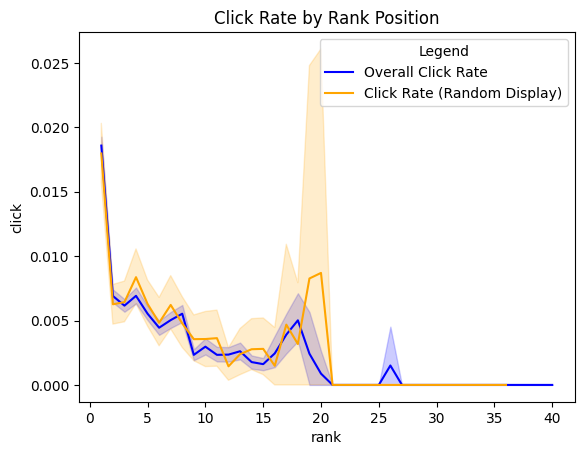

In [8]:
sns.lineplot(data=df, x='rank', y='click', label="Overall Click Rate", color="blue")

# Plot the second line (filtered data)
sns.lineplot(data=df[df['displayrandom'] == 1], x='rank', y='click', 
             label="Click Rate (Random Display)", color="orange")

# Add title and legend
plt.title("Click Rate by Rank Position")
plt.legend(title="Legend")
plt.show()


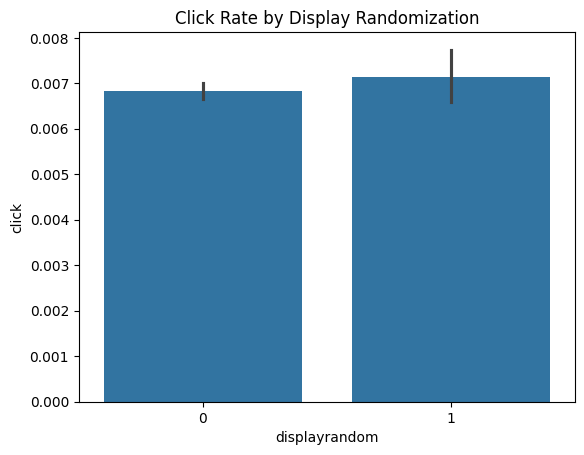

In [25]:
sns.barplot(data=df, x='displayrandom', y='click')
plt.title("Click Rate by Display Randomization")
plt.show()

## Categorical user features

### cat0

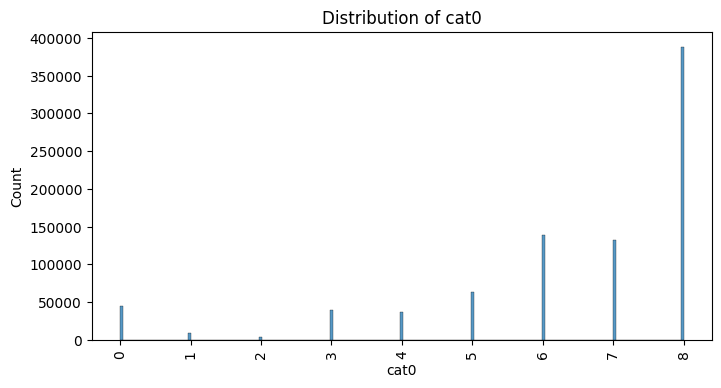

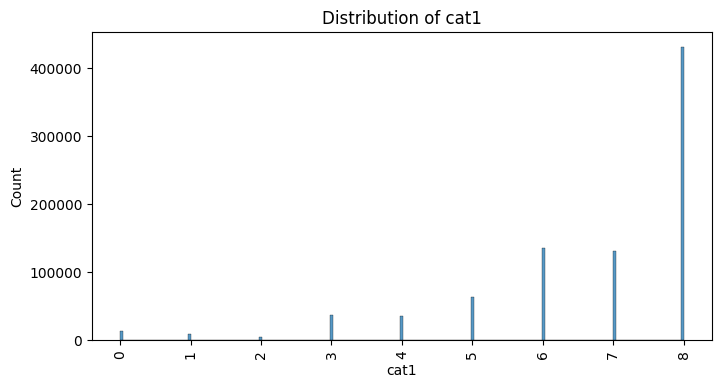

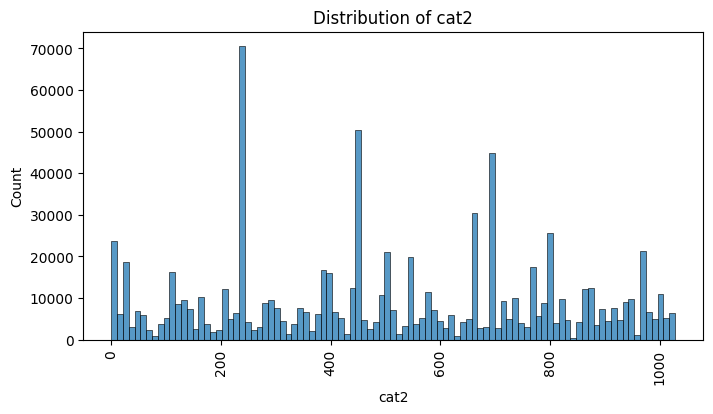

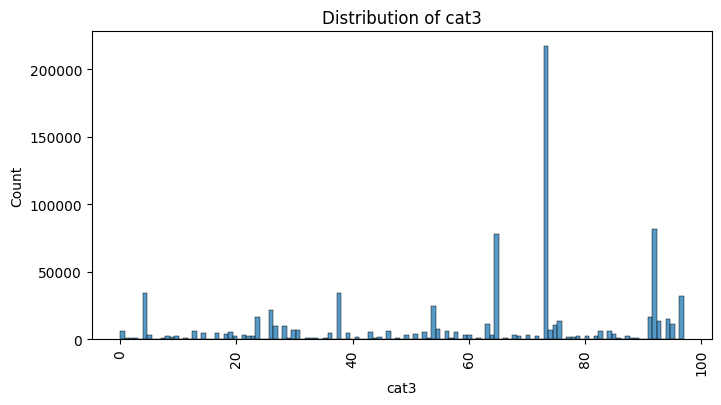

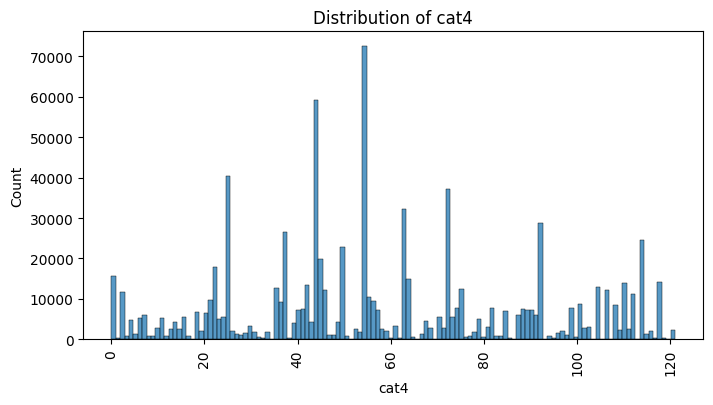

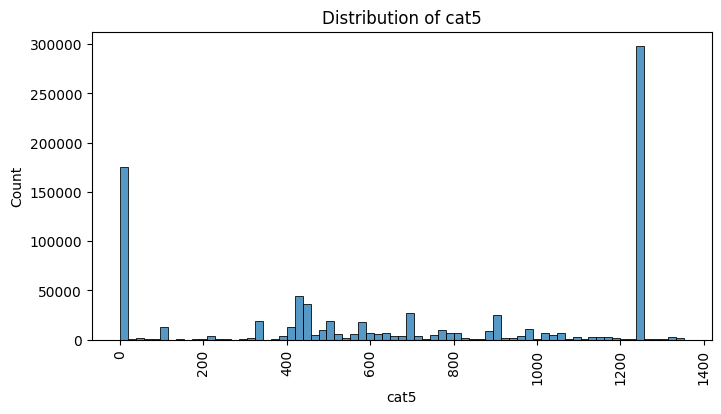

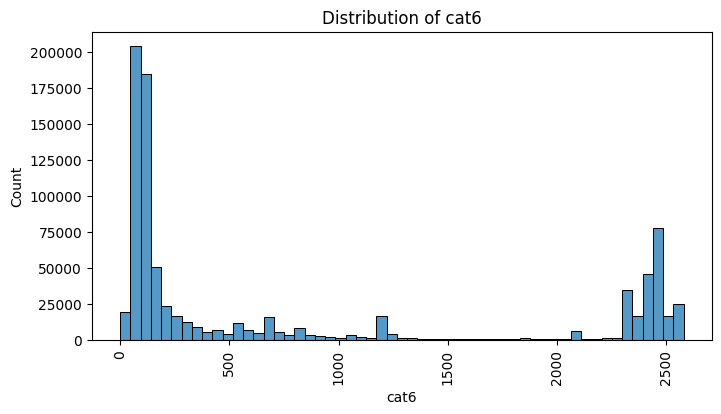

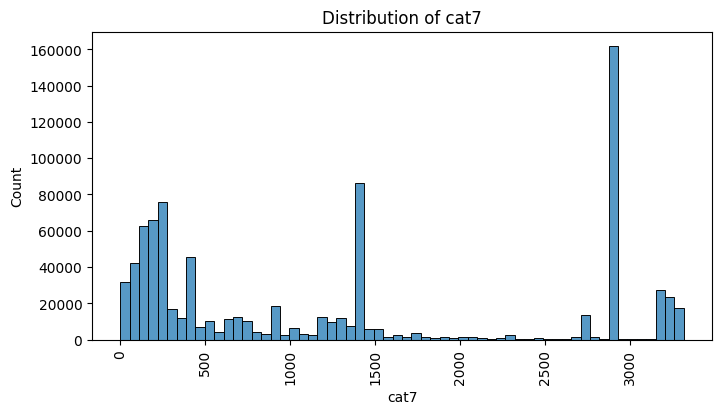

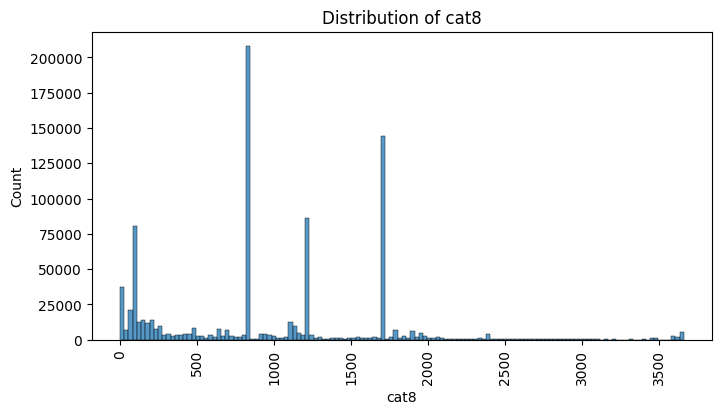

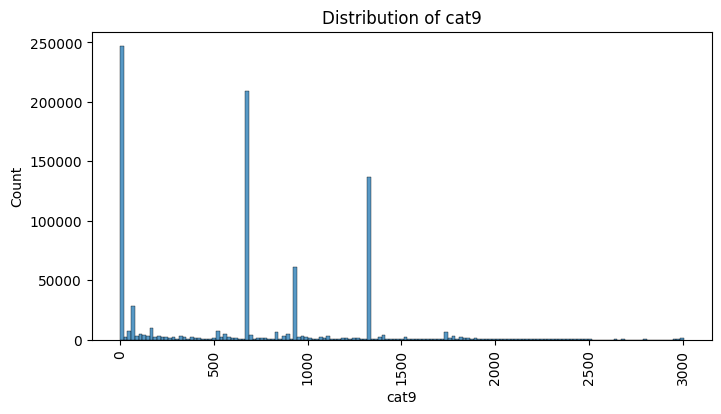

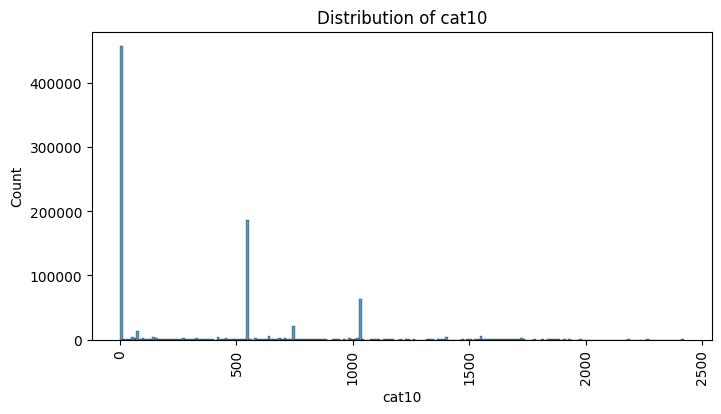

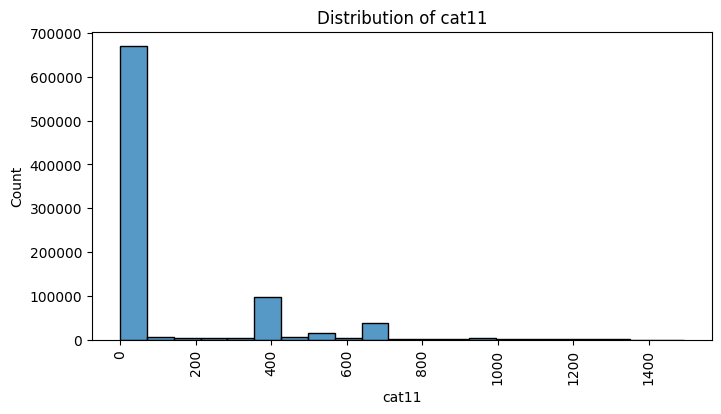

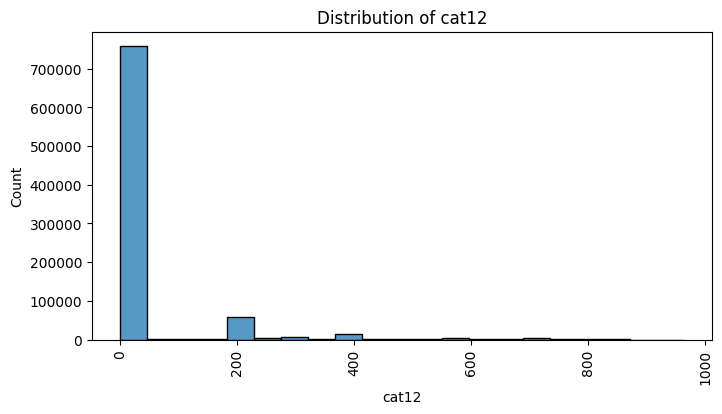

In [5]:
categorical_features = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

In [26]:
corr_matrix = df[numerical_features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Highly correlated features:", high_corr_features)

Highly correlated features: ['num34', 'num36', 'num39', 'num40', 'num41', 'num42', 'num43', 'num46', 'num47', 'num48', 'num50']


In [27]:
cat_features = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']
cat_corr_matrix = df[cat_features].corr().abs()
upper_triangle_cat = cat_corr_matrix.where(np.triu(np.ones(cat_corr_matrix.shape), k=1).astype(bool))
high_corr_cat_features = [column for column in upper_triangle_cat.columns if any(upper_triangle_cat[column] > 0.5)]
print("Highly correlated categorical features:", high_corr_cat_features)

Highly correlated categorical features: ['cat1', 'cat11', 'cat12']


In [28]:
low_variance_features = [col for col in df.columns if df[col].var() < 0.1]
print("Low-variance features:", low_variance_features)

Low-variance features: ['click', 'displayrandom']


### More Analysis

In [29]:
new_df=df.groupby(['rank','protected_attribute','senior','displayrandom','click']).size().reset_index().rename(columns={0:'click_counts'})

In [30]:
new_df.head(1)

,rank,protected_attribute,senior,displayrandom,click,click_counts
0,1,0,0,0,0,22566


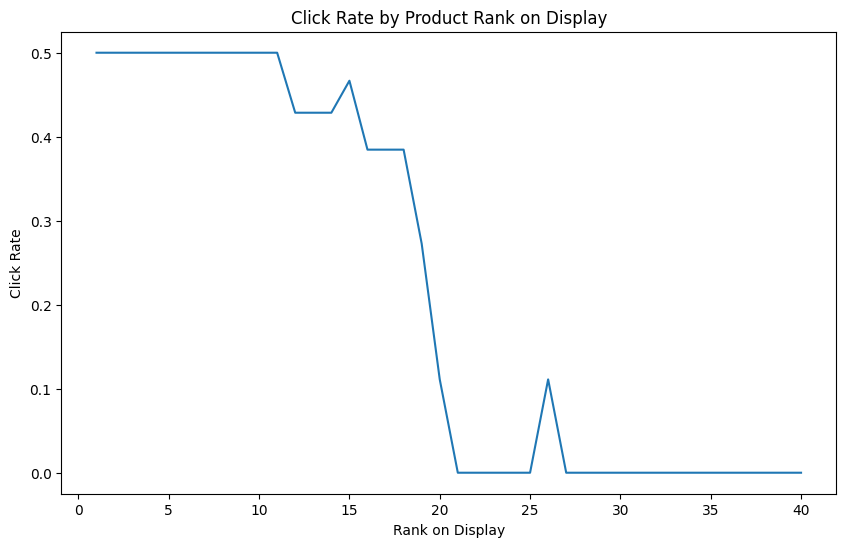

In [31]:
# Calculate click-through rate (CTR) by rank
rank_click_rate = new_df.groupby('rank')['click'].mean().reset_index()

# Plot click rate by rank
plt.figure(figsize=(10, 6))
sns.lineplot(data=rank_click_rate, x='rank', y='click')
plt.title("Click Rate by Product Rank on Display")
plt.xlabel("Rank on Display")
plt.ylabel("Click Rate")
plt.show()

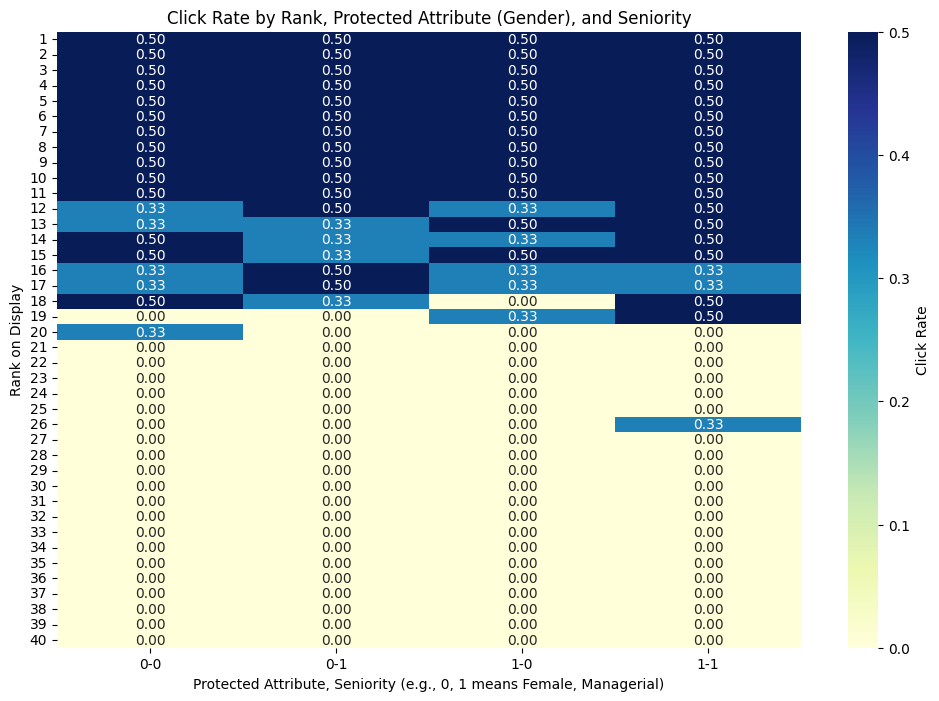

In [32]:
pivot_data = new_df.groupby(['rank', 'protected_attribute', 'senior'])['click'].mean().unstack(['protected_attribute', 'senior'])

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Click Rate'})
plt.title("Click Rate by Rank, Protected Attribute (Gender), and Seniority")
plt.xlabel("Protected Attribute, Seniority (e.g., 0, 1 means Female, Managerial)")
plt.ylabel("Rank on Display")
plt.show()

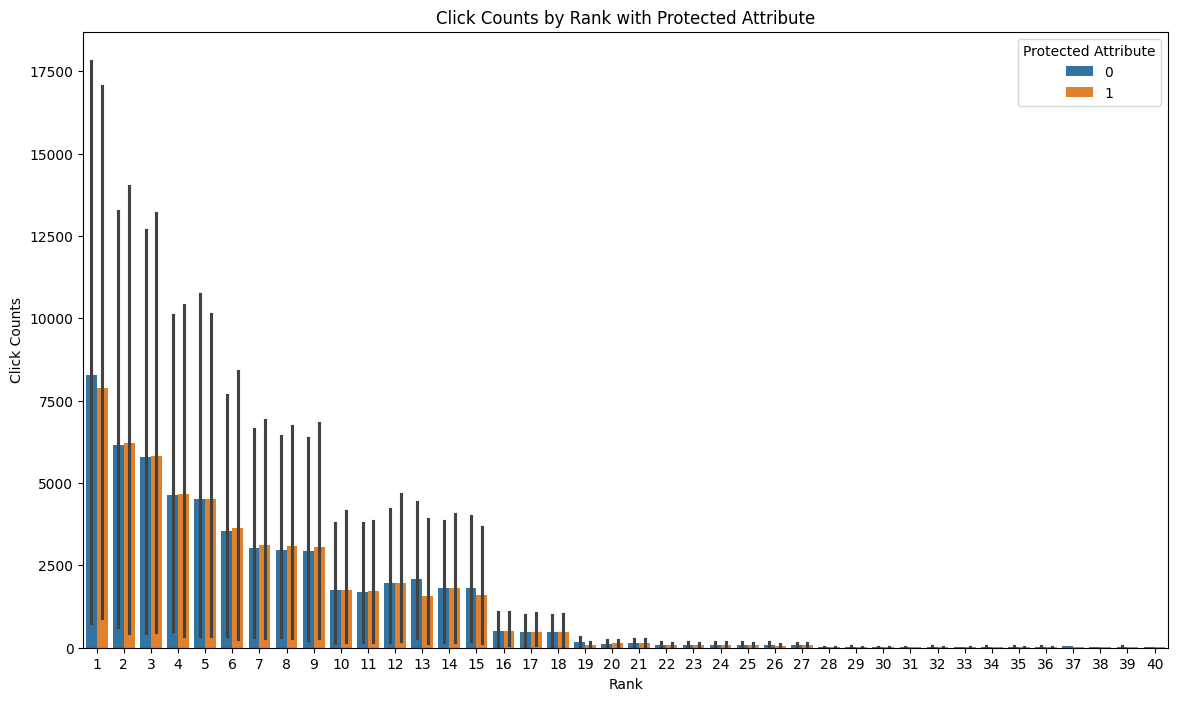

In [33]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='protected_attribute',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with Protected Attribute")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='Protected Attribute', loc='upper right')

plt.show()

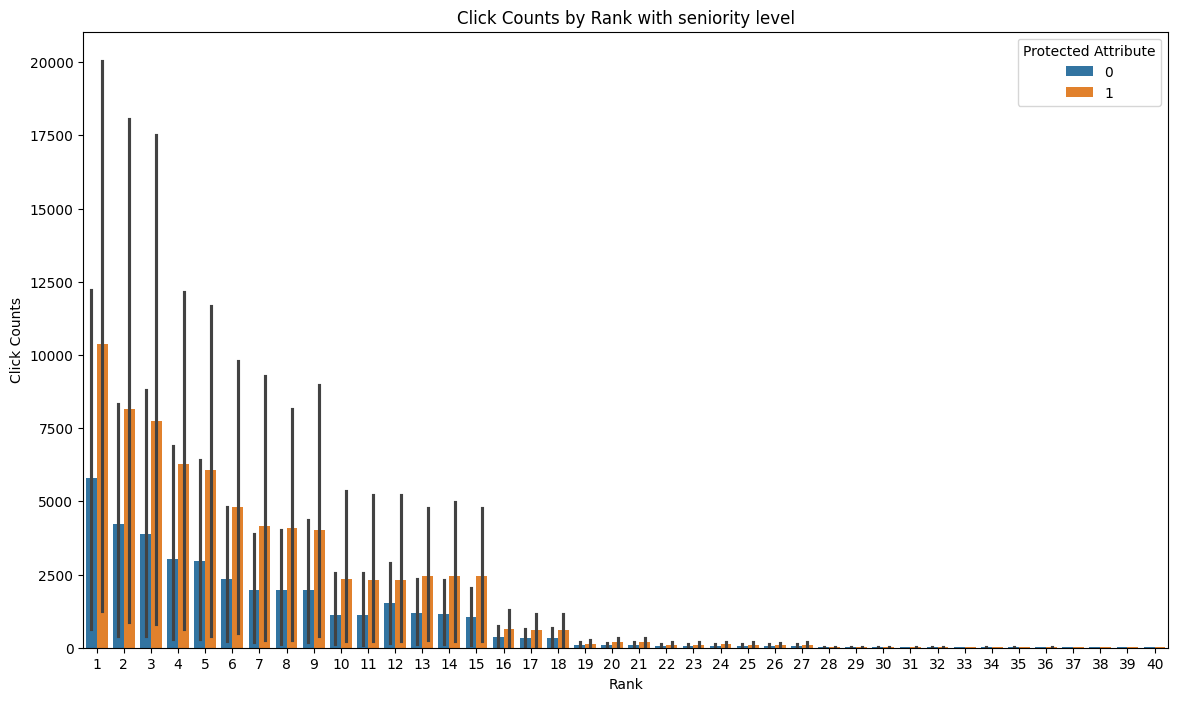

In [34]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='senior',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with seniority level")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='Seniority', loc='upper right')

plt.show()

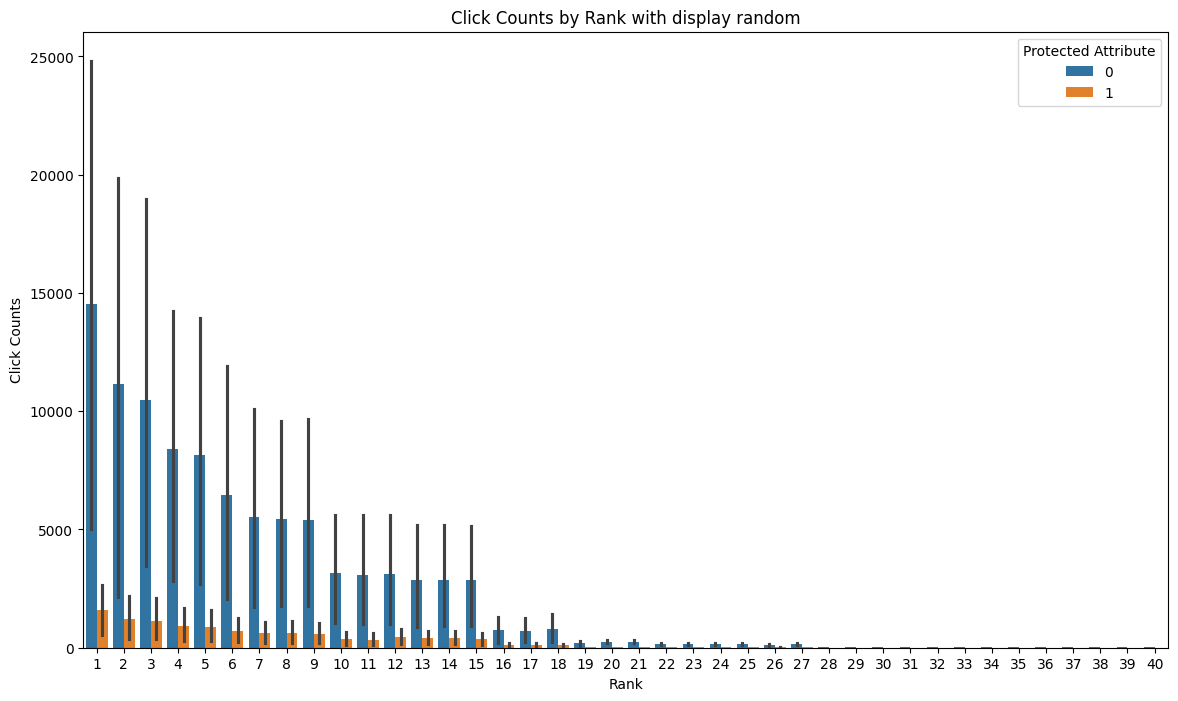

In [35]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='displayrandom',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with display random")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='display random', loc='upper right')

plt.show()

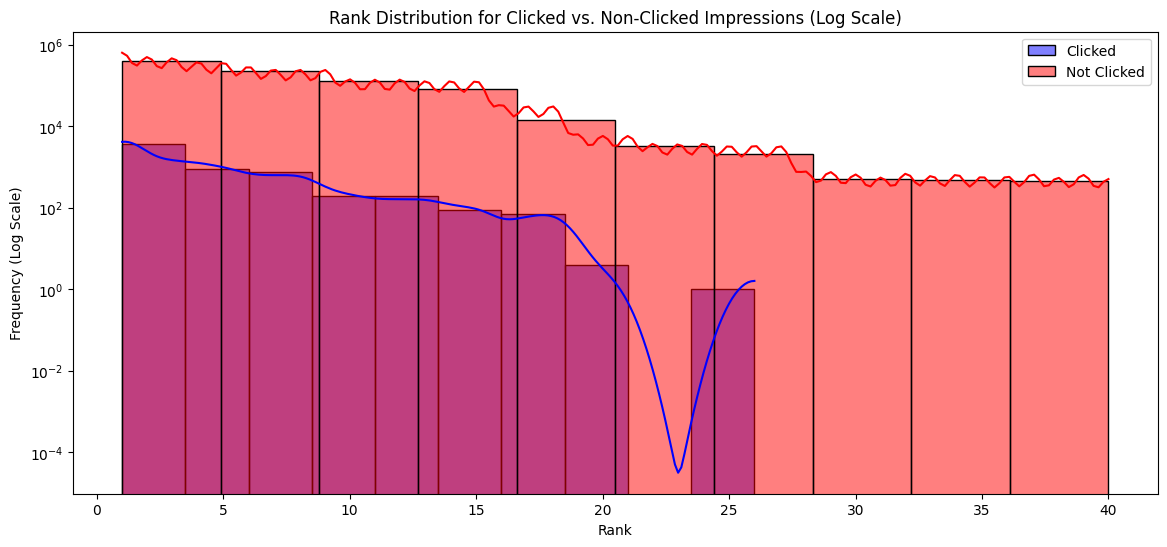

In [36]:
clicked_df = df[df['click'] == 1]
non_clicked_df = df[df['click'] == 0]

plt.figure(figsize=(14, 6))
sns.histplot(clicked_df['rank'], color='blue', kde=True, label='Clicked', bins=10)
sns.histplot(non_clicked_df['rank'], color='red', kde=True, label='Not Clicked', bins=10)
plt.yscale('log')
plt.title("Rank Distribution for Clicked vs. Non-Clicked Impressions (Log Scale)")
plt.xlabel("Rank")
plt.ylabel("Frequency (Log Scale)")
plt.legend()
plt.show()

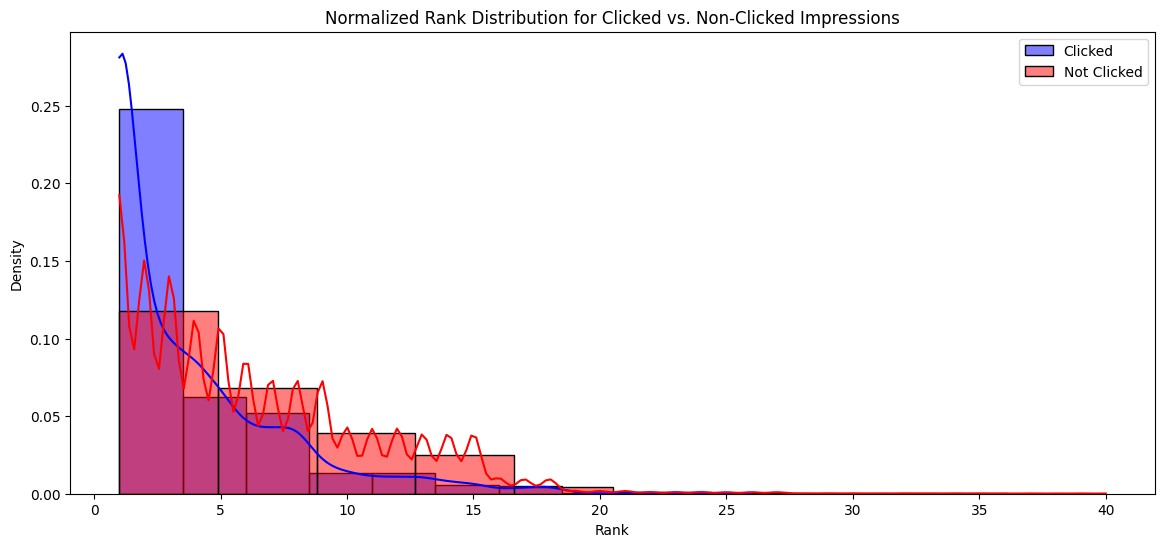

In [37]:
plt.figure(figsize=(14, 6))
sns.histplot(clicked_df['rank'], color='blue', kde=True, label='Clicked', bins=10, stat="density")
sns.histplot(non_clicked_df['rank'], color='red', kde=True, label='Not Clicked', bins=10, stat="density")
plt.title("Normalized Rank Distribution for Clicked vs. Non-Clicked Impressions")
plt.xlabel("Rank")
plt.ylabel("Density")
plt.legend()
plt.show()

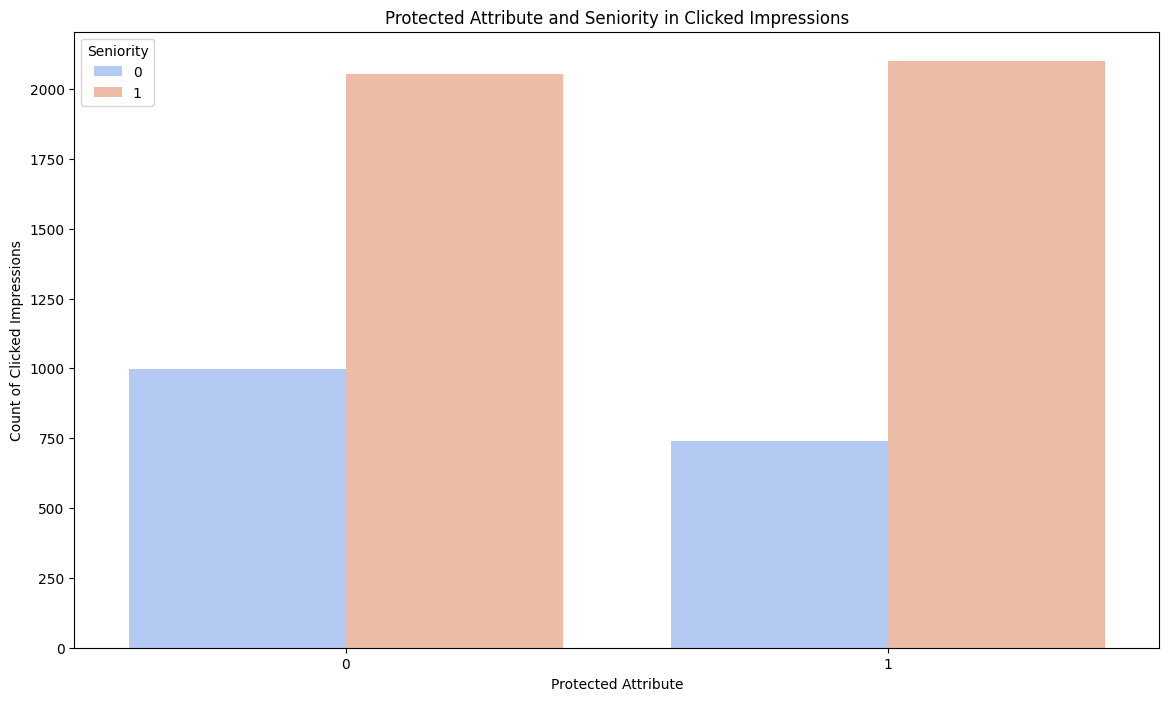

In [38]:
plt.figure(figsize=(14, 8))
sns.countplot(x='protected_attribute', hue='senior', data=clicked_df, palette='coolwarm')
plt.title("Protected Attribute and Seniority in Clicked Impressions")
plt.xlabel("Protected Attribute")
plt.ylabel("Count of Clicked Impressions")
plt.legend(title="Seniority")
plt.show()

In [39]:
clicked = 
non_clicked = 
corr_clicked = clicked_df.corr()
corr_non_clicked = non_clicked_df.corr()

plt.figure(figsize=(14, 6))
sns.heatmap(corr_clicked, cmap='YlGnBu', annot=False, cbar=True)
plt.title("Correlation Matrix for Clicked Impressions")
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(corr_non_clicked, cmap='YlOrRd', annot=False, cbar=True)
plt.title("Correlation Matrix for Non-Clicked Impressions")
plt.show()

SyntaxError: invalid syntax (2870101617.py, line 1)